In [13]:
import pandas as pd

In [14]:
df = pd.read_csv(r"C:\Users\user\Documents\NY_restaurant_inspection.csv",encoding='utf-8')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2588\3136970894.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\user\Documents\NY_restaurant_inspection.csv",encoding='utf-8')


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point1,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,50044265,NEW TASTE RESTAURANT,Queens,9462,CORONA AVE,11373.0,7185928738,Chinese,05/06/2019,Violations were cited in the following area(s).,...,46100.0,4046364.0,4.018770e+09,QN29,NaN,NaN,NaN,NaN,NaN,NaN
1,50110994,NaN,Staten Island,189,BROAD STREET,10304.0,929 3125936,NaN,01/01/1900,NaN,...,2100.0,5014047.0,5.005410e+09,SI37,NaN,NaN,NaN,NaN,NaN,NaN
2,50092290,KRAVE IT,Queens,4015,BELL BLVD,11361.0,3478368713,Pizza,11/13/2019,Violations were cited in the following area(s).,...,112300.0,4138266.0,4.062880e+09,QN46,NaN,NaN,NaN,NaN,NaN,NaN
3,50137465,ROYAL ROOSTER HOTPOT,Queens,25311,NORTHERN BLVD,11362.0,19172881992,NaN,01/01/1900,NaN,...,147900.0,4169409.0,4.081320e+09,QN45,NaN,NaN,NaN,NaN,NaN,NaN
4,50130446,KOPI KOPI,Manhattan,570,LEXINGTON AVENUE,10022.0,9147382933,NaN,01/01/1900,NaN,...,10000.0,1036459.0,1.013050e+09,MN19,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
# check for duplicates values
print("\nDuplicate values")
print(df.duplicated().sum())

# Drop irrelevant columns
columns_to_drop = ['PHONE', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Location Point1', 'Zip Codes',
                   'Community Districts', 'Borough Boundaries', 'City Council Districts', 'Police Precincts']
df = df.drop(columns=columns_to_drop)




Missing values:
CAMIS                          0
DBA                         1780
BORO                           0
BUILDING                     352
STREET                        28
ZIPCODE                     2739
PHONE                          7
CUISINE DESCRIPTION         4395
INSPECTION DATE                0
ACTION                      4395
VIOLATION CODE              5470
VIOLATION DESCRIPTION       5470
CRITICAL FLAG                  0
SCORE                      11097
GRADE                     102021
GRADE DATE                109405
RECORD DATE                    0
INSPECTION TYPE             4395
Latitude                     291
Longitude                    291
Community Board             3309
Council District            3313
Census Tract                3313
BIN                         4301
BBL                          598
NTA                         3309
Location Point1           198023
Zip Codes                 198023
Community Districts       198023
Borough Boundaries        

In [16]:
# Drop rows with missing values in key columns
key_columns = ['CAMIS', 'DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION', 'INSPECTION DATE']
df = df.dropna(subset=key_columns)
# Handle missing values in specific columns
df['CUISINE DESCRIPTION'].fillna('Unknown', inplace=True)
#Handle duplicate values
df.drop_duplicates(inplace= True)

# Convert ZIPCODE column to integer type
df['ZIPCODE'] = df['ZIPCODE'].astype('Int64')

# Convert INSPECTION DATE column to datetime type
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], errors='coerce')



In [17]:
# Remove leading/trailing whitespaces from string columns
string_columns = ['DBA', 'BORO', 'STREET', 'CUISINE DESCRIPTION', 'ACTION', 'VIOLATION CODE']
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())
# Display the cleaned dataset structure
print("\nCleaned dataset structure:")
print(df.head())



Cleaned dataset structure:
      CAMIS                          DBA       BORO BUILDING  \
0  50044265         NEW TASTE RESTAURANT     Queens     9462   
2  50092290                     KRAVE IT     Queens     4015   
7  41267350           TENDA ASIAN FUSION   Brooklyn     1734   
8  50035292              THE LOCAL @ JFK     Queens      NKA   
9  41148810  TROPICAL SPANISH RESTAURANT  Manhattan     3771   

                 STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0            CORONA AVE    11373             Chinese      2019-05-06   
2             BELL BLVD    11361               Pizza      2019-11-13   
7   SHEEPSHEAD BAY ROAD    11235            Japanese      2022-10-19   
8  JFK INTL AIRPORT 58H    11430            American      2019-10-16   
9              BROADWAY    10032             Spanish      2022-02-16   

                                            ACTION VIOLATION CODE  ...  \
0  Violations were cited in the following area(s).            09A  ...   
2  Vio

In [18]:
# Select columns for statistical analysis
columns_to_analyze = ['CAMIS', 'ZIPCODE', 'SCORE',]

# Calculate and print statistics for each selected column
for column in columns_to_analyze:
    print(f"\nStatistics for column: {column}")
    print("-----------------------------------------")
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Range:", df[column].max() - df[column].min())
    print("Standard Deviation:", df[column].std())
    print("Frequency:")
    print(df[column].value_counts().sort_index())
    print("Skewness:", df[column].skew())
    print("Variance:", df[column].var())
    print("Mode:")
    print(df[column].mode())
    print("Kurtosis:", df[column].kurtosis())



Statistics for column: CAMIS
-----------------------------------------
Mean: 47368252.02505953
Median: 50058204.0
Range: 20062438
Standard Deviation: 4107085.993402374
Frequency:
CAMIS
30075445    11
30112340     8
30191841     5
40356018     4
40356483    11
            ..
50137563     2
50137620     3
50137626     3
50137830    10
50137883     7
Name: count, Length: 23654, dtype: int64
Skewness: -0.8670762265407669
Variance: 16868155357201.965
Mode:
0    40398688
Name: CAMIS, dtype: int64
Kurtosis: -1.2098524515277362

Statistics for column: ZIPCODE
-----------------------------------------
Mean: 10708.033776341876
Median: 11101.0
Range: 2345
Standard Deviation: 593.2096369204805
Frequency:
ZIPCODE
10000       6
10001    3408
10002    3548
10003    4279
10004     987
         ... 
11692      57
11693     178
11694     218
11697      27
12345      10
Name: count, Length: 220, dtype: Int64
Skewness: -0.09719753556312812
Variance: 351897.6733353283
Mode:
0    10013
Name: ZIPCODE, dtype

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("bmh")

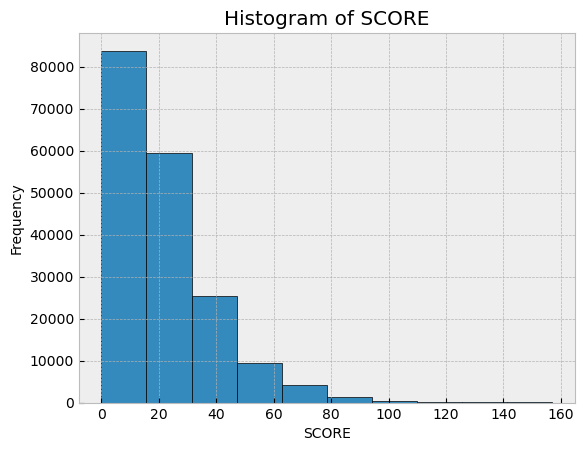

In [25]:
# Histogram
plt.hist(df["SCORE"], bins=10, edgecolor="black")
plt.xlabel("SCORE")
plt.ylabel("Frequency")
plt.title("Histogram of SCORE")
plt.show()

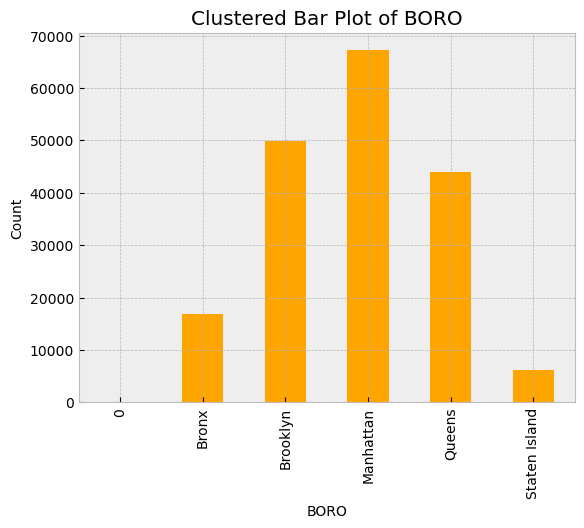

In [26]:

# Group by a categorical column and calculate the counts
grouped_df = df.groupby("BORO")["SCORE"].count()

# Clustered bar plot
grouped_df.plot(kind="bar", color="orange")
plt.xlabel("BORO")
plt.ylabel("Count")
plt.title("Clustered Bar Plot of BORO")
plt.show()


In [ ]:
# Scatter plot
plt.scatter(df["CAMIS"], df["SCORE"])
plt.xlabel(